In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

# Fonctions

In [28]:
def initialization(dimensions):
    
   C=len(dimensions) 
   
   parameters={}
   
   for c in range( 1 , C ):
     parameters['W'+str(c)]=np.random.randn(dimensions[c],dimensions[c-1])
     parameters['b'+str(c)]=np.random.randn(dimensions[c],1)

   return parameters

In [29]:
def forward_propagation(X, parameters):
    
    C =len(parameters) // 2
    activations={'A0':X}
    
    for c in range(1, C + 1 ):
        Z = parameters['W'+str(c)].dot(activations['A'+str(c-1)])+ parameters['b'+str(c)]
        activations['A'+str(c)]=1/(1+np.exp(-Z))
    return activations

In [48]:
def back_propagation(y, activations, parameters ):
    
    C= len(parameters) // 2
    m = y.shape[1]
    
    dZ = activations['A'+ str(C)] - y
    gradients={}
    
    for c in reversed(range(1, C+1)):
        
        gradients['dW'+str(c)]=1/ m * dZ.dot((activations['A'+str(c-1)]).T)
        gradients['db'+str(c)]=1/ m * np.sum(dZ, axis=1, keepdims=True)
        if c>1 : 
         dZ=np.dot(parameters['W'+str(c)].T,dZ) * activations['A'+str(c-1)] * (1-activations['A'+str(c-1)])
  
    
    return gradients

In [49]:
def update(gradients, parameters, learning_rate):
    
    C=len(parameters)//2
    for c in range(1 ,C+1):
        parameters['W'+str(c)]=parameters['W'+str(c)] - learning_rate * gradients['dW'+str(c)]
        parameters['b'+str(c)]=parameters['b'+str(c)] - learning_rate * gradients['db'+str(c)]

    return parameters

In [50]:
def predict(X, parameters):
  activations = forward_propagation(X, parameters)
  C=len(parameters) // 2
  AF=activations['A'+ str(C)]
  A2 = activations['A2']
  return AF >= 0.5

In [54]:
def visualization(X, y, parameters, ax):
    """
    Visualize the decision boundary of the neural network.

    Parameters:
    - X: Input data
    - y: True labels
    - parameters: Model parameters
    - ax: Matplotlib axis for plotting
    """
    h = 0.01
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = predict(np.c_[xx.ravel(), yy.ravel()].T, parameters)
    Z = Z.reshape(xx.shape)

    ax[2].contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    ax[2].scatter(X[0, :], X[1, :], c=y.flatten(), cmap=plt.cm.Spectral)
    ax[2].set_title("Decision Boundary")
    ax[2].set_xlabel("Feature 1")
    ax[2].set_ylabel("Feature 2")



In [55]:
def neural_network(X, y, hidden_layers = (32,32,32), learning_rate = 0.1, n_iter = 1000):
    
    np.random.seed(0)
    
    # parameters initialization 
    dimensions = list(hidden_layers)
    dimensions.insert(0 , X.shape[0])
    dimensions.append(y.shape[0])
    parameters = initialization(dimensions)

    train_loss = []
    train_acc = []
    history = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        
        activations = forward_propagation(X, parameters)
        gradients=back_propagation(y , activations , parameters)
        parameters=update(gradients , parameters , learning_rate )
        
        if i%10==0 : 
            C = len( parameters ) // 2
            train_loss.append(log_loss(y,activations['A'+ str( C )]))
            y_pred = predict(X, parameters )
            current_accuracy = accuracy_score ( y.flatten(), y_pred.flatten())
            train_acc.append(current_accuracy)

        history.append([parameters.copy(), train_loss, train_acc, i])

    fig, ax = plt.subplots(nrows= 1, ncols= 3 , figsize = (18,4))
    ax[0].plot(train_loss , label = 'train loss')
    ax[0].legend()
    
    ax[1].plot(train_acc , label = 'train acc')
    ax[1].legend()
    visualization(X,y , parameters , ax)
    plt.show()

    return parameters

# Dataset

Dimensions of X: (2, 300)
Dimensions of y: (1, 300)


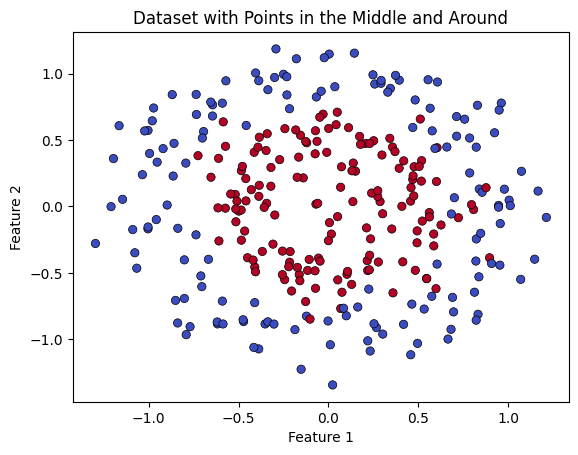

In [113]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Create a dataset with points in the middle and around it
X, y = make_circles(n_samples=300, noise=0.15, factor=0.5, random_state=42)
# Reshape y to match the expected format
y = y.reshape((1, y.shape[0]))
X=X.T
# Print dimensions
print('Dimensions of X:', X.shape)
print('Dimensions of y:', y.shape)
# Plot the dataset
plt.scatter(X[0, :], X[1, :], c=y, cmap='coolwarm', edgecolors='k', linewidths=0.5)
plt.title('Dataset with Points in the Middle and Around')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:02<00:00, 349.40it/s]


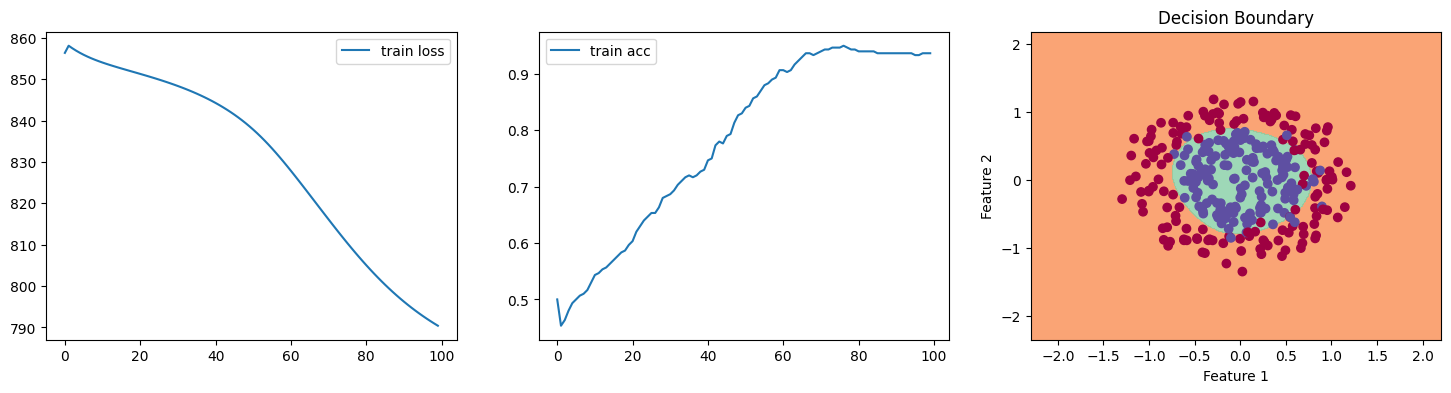

In [118]:
parameters=neural_network(X,y,hidden_layers=(32,16,32),n_iter=1000,learning_rate=0.1)